In [1]:

from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/zip/eye/dataset'

In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [10]:
with tf.device('/device:GPU:0'):
  dblock = DataBlock(
      blocks = (ImageBlock(cls=PILImageBW),CategoryBlock),
      get_items =get_image_files,
      splitter = RandomSplitter(valid_pct = .2, seed = 42),
      get_y = parent_label,
      item_tfms= Resize(128),
      batch_tfms = [Brightness(max_lighting = 0.1, p = 0.5)],
  )
  loader = dblock.dataloaders(path,bs = 64)

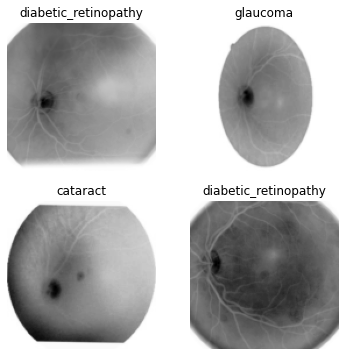

In [11]:
with tf.device('/device:GPU:0'):
  loader.train.show_batch(max_n=4,nrows=2)

In [12]:
with tf.device('/device:GPU:0'):
  dblock = dblock.new(item_tfms = Resize(128,ResizeMethod.Squish),batch_tfms = [FlipItem(p=1.)] )
  dblock = dblock.new(item_tfms = Resize(128,ResizeMethod.Pad,pad_mode='zeros') )

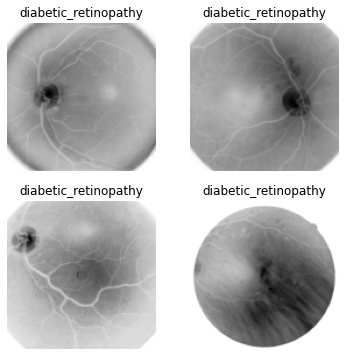

In [13]:
with tf.device('/device:GPU:0'):
  loader.train.show_batch(max_n=4,nrows=2)

In [ ]:
with tf.device('/device:GPU:0'):
  torch.save(loader,path+'/aug2_images.pkl')

In [ ]:
aug_img = path+'/aug2_images.pkl'

In [ ]:
with tf.device('/device:GPU:0'):
  load_img = torch.load(aug_img)
  model = vision_learner(load_img,xresnet34_deeper,metrics=[error_rate,accuracy])
  model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.354109,0.693931,0.279953,0.720047,19:01


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.846046,0.605665,0.237248,0.762752,00:46
1,0.746326,0.532773,0.206406,0.793594,00:46
2,0.687467,0.497490,0.196916,0.803084,00:46
3,0.610368,0.487555,0.194543,0.805457,00:48
4,0.567890,0.484703,0.187426,0.812574,00:45


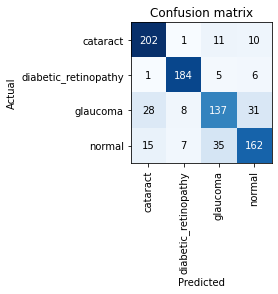

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

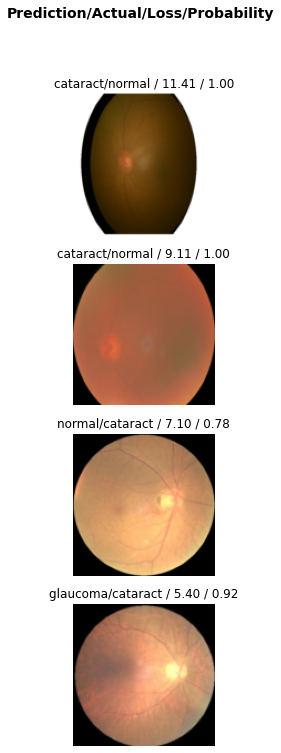

In [ ]:
interp.plot_top_losses(4,nrows = 4)

In [ ]:
model.export(path+'/model2-81%.pkl')